In [1]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
# Load CSV
df = pd.read_csv ('Table 130-06806.csv')
df.head(10)

,Table 130-06806 : Average household size and median monthly household income of households by District Council district,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,Average household size (1) (2),Average household size (1) (2),Average household size (1) (2),Average household size (1) (2),Median monthly household income (1) (3),Median monthly household income (1) (3),Median monthly household income (1) (3),Median monthly household income (1) (3),Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...,Median monthly household income of economicall...
2,NaN,No.,No.,No.,No.,HK$,HK$,HK$,HK$,HK$,HK$,HK$,HK$,HK$,HK$,HK$,HK$
3,Year,2019,2020,2021,2022,2019,2020,2021,2022,2019,2020,2021,2022,2019,2020,2021,2022
4,District Council district (DCD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Central and Western,2.6,2.5,2.6,2.6,42000,41200,42000,42300,53000,53100,52500,56100,51900,52500,51500,55000
6,Wan Chai (5),2.5,2.5,2.6,2.6,44500,40000,40400,41800,56800,53000,55500,59800,56200,51000,55000,59000
7,Eastern (5),2.8,2.8,2.8,2.7,34900,32200,31500,31500,44100,41400,40300,41000,43500,40800,40200,40500
8,Southern,3.0,3.0,2.9,2.9,33200,32100,33000,34200,41000,40000,41700,42600,40000,39800,41200,41700
9,Yau Tsim Mong,2.5,2.5,2.5,2.4,30000,28000,27900,29000,38000,38000,35200,37500,38000,37500,35000,37000


In [3]:
# Drop unnecessary rows
df.drop(list(range(0, 5))+list(range(23, 39)), inplace=True)

In [4]:
df.rename(columns={"Table 130-06806 : Average household size and median monthly household income of households by District Council district":"district"}, inplace=True)

In [5]:
# Replace inconsistent values
df['district'].replace({'Wan Chai (5)':'Wan Chai', 'Eastern (5)':'Eastern'}, inplace=True)

In [6]:
# Isolate household size and median household monthly income
df1 = df.iloc[:, [0,5,6,7,8]].copy()

In [7]:
# Rename column names and reset index
year_list = ['2019', '2020', '2021', '2022']
column_list = ['median_monthly_household_income']

new_list = []
for x in column_list:
    for y in year_list:
        a = x + '_' + y
        new_list.append(a)

new_list.insert(0, 'district')
df1.columns = new_list

In [8]:
df1.reset_index(inplace=True)

In [9]:
df1.drop(['index'], axis=1, inplace=True)

In [10]:
df1.dtypes

district                                object
median_monthly_household_income_2019    object
median_monthly_household_income_2020    object
median_monthly_household_income_2021    object
median_monthly_household_income_2022    object
dtype: object

In [11]:
for column in df1.columns:
    try:
        if df1[column].dtype == 'object':
            df1[column] = df1[column].astype('int64')
    except:
        df1[column] = df1[column].astype(df1[column].dtype)

df1.dtypes

district                                object
median_monthly_household_income_2019     int64
median_monthly_household_income_2020     int64
median_monthly_household_income_2021     int64
median_monthly_household_income_2022     int64
dtype: object

In [12]:
df1['percent_change'] = ((df1['median_monthly_household_income_2022'] - df1['median_monthly_household_income_2019']) / df1['median_monthly_household_income_2019']) * 100
df1['percent_change'] = df1['percent_change'].round(2)
df1

,district,median_monthly_household_income_2019,median_monthly_household_income_2020,median_monthly_household_income_2021,median_monthly_household_income_2022,percent_change
0,Central and Western,42000,41200,42000,42300,0.71
1,Wan Chai,44500,40000,40400,41800,-6.07
2,Eastern,34900,32200,31500,31500,-9.74
3,Southern,33200,32100,33000,34200,3.01
4,Yau Tsim Mong,30000,28000,27900,29000,-3.33
5,Sham Shui Po,25000,23500,22000,22800,-8.80
6,Kowloon City,30400,30000,29700,30000,-1.32
7,Wong Tai Sin,26000,24300,23300,24400,-6.15
8,Kwun Tong,23000,22000,22200,22100,-3.91
9,Kwai Tsing,25000,24300,23300,24300,-2.80


In [29]:
df1['district'] = df1['district'].str.upper()
df1
df1.to_csv('Household Income.csv')

In [14]:
df2 = df1.sort_values(by='percent_change', ascending=False).copy().head(10)
df2

,district,median_monthly_household_income_2019,median_monthly_household_income_2020,median_monthly_household_income_2021,median_monthly_household_income_2022,percent_change
16,SAI KUNG,37000,35600,37200,40000,8.11
12,YUEN LONG,27300,25000,27000,28900,5.86
11,TUEN MUN,25000,24700,25400,25800,3.20
3,SOUTHERN,33200,32100,33000,34200,3.01
17,ISLANDS,28700,26100,28800,29400,2.44
0,CENTRAL AND WESTERN,42000,41200,42000,42300,0.71
15,SHA TIN,30000,28400,27100,29700,-1.00
6,KOWLOON CITY,30400,30000,29700,30000,-1.32
14,TAI PO,30700,29500,30000,30200,-1.63
10,TSUEN WAN,33000,30000,31800,32300,-2.12


In [15]:
df2_1 = df1.sort_values(by='median_monthly_household_income_2022', ascending=False).copy().head(10)
df2_1

,district,median_monthly_household_income_2019,median_monthly_household_income_2020,median_monthly_household_income_2021,median_monthly_household_income_2022,percent_change
0,CENTRAL AND WESTERN,42000,41200,42000,42300,0.71
1,WAN CHAI,44500,40000,40400,41800,-6.07
16,SAI KUNG,37000,35600,37200,40000,8.11
3,SOUTHERN,33200,32100,33000,34200,3.01
10,TSUEN WAN,33000,30000,31800,32300,-2.12
2,EASTERN,34900,32200,31500,31500,-9.74
14,TAI PO,30700,29500,30000,30200,-1.63
6,KOWLOON CITY,30400,30000,29700,30000,-1.32
15,SHA TIN,30000,28400,27100,29700,-1.00
17,ISLANDS,28700,26100,28800,29400,2.44


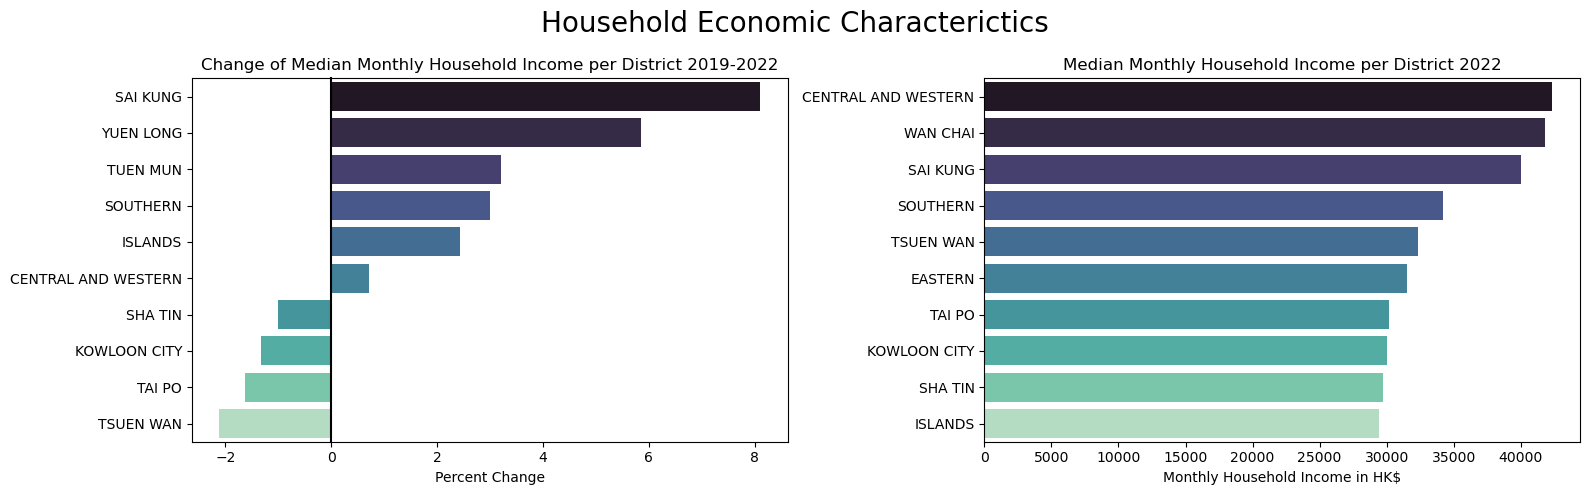

In [16]:
fig, axs = plt.subplots(1, 2, figsize= (16, 5))
fig.suptitle('Household Economic Characterictics', size=20)

sns.barplot(x=df2['percent_change'], y=df2['district'], data=df2, ax=axs[0], palette='mako').set(title='Change of Median Monthly Household Income per District 2019-2022')
sns.barplot(x=df2_1['median_monthly_household_income_2022'], y=df2_1['district'], data=df2_1, ax=axs[1], palette='mako').set(title='Median Monthly Household Income per District 2022')

axs[0].set_ylabel('')
axs[0].set_xlabel('Percent Change')
axs[0].axvline(0, color="k", clip_on=False)

axs[1].set_ylabel('')
axs[1].set_xlabel('Monthly Household Income in HK$')

plt.subplots_adjust(wspace=.4)
plt.tight_layout()
plt.show()

In [17]:
df_edu_att = pd.read_csv('Table_IDDS_Educational Attainment.csv')
df_edu_att.drop(list(range(0, 4))+list(range(24, 35)), inplace=True)
df_edu_att

,"Population by Year, Educational Attainment (Highest Level Attended) and Area - for example : District Council District, New Town",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
4,Educational Attainment (Highest Level Attended),NaN,No schooling/ Pre-primary,Primary,Lower secondary,Upper secondary,Post-secondary: Diploma/ Certificate,Post-secondary: Sub-degree course,Post-secondary: Degree course,Total
5,Year,Area - for example : District Council District...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021,Central and Western,15923,28142,25211,54954,13343,9129,89251,235953
7,2021,Wan Chai (1),10625,17537,17461,41816,8868,6843,63545,166695
8,2021,Eastern (1),40043,77668,79447,142395,29015,23470,137565,529603
9,2021,Southern,25391,44455,39817,69155,12924,10827,60709,263278
10,2021,Yau Tsim Mong,24824,46334,47758,83946,15965,12915,78905,310647
11,2021,Sham Shui Po,36567,82489,83304,112234,19633,17593,79270,431090
12,2021,Kowloon City,32079,63330,64391,104471,20495,17548,108320,410634
13,2021,Wong Tai Sin,36149,82850,77862,109852,20071,18467,61551,406802


In [18]:
df_edu_att.columns = list(df_edu_att.iloc[0,:])
df_edu_att.drop(list(range(4,6)), inplace=True)
df_edu_att.drop(df_edu_att.columns[0], axis=1, inplace=True)
df_edu_att

,NaN,No schooling/ Pre-primary,Primary,Lower secondary,Upper secondary,Post-secondary: Diploma/ Certificate,Post-secondary: Sub-degree course,Post-secondary: Degree course,Total
6,Central and Western,15923,28142,25211,54954,13343,9129,89251,235953
7,Wan Chai (1),10625,17537,17461,41816,8868,6843,63545,166695
8,Eastern (1),40043,77668,79447,142395,29015,23470,137565,529603
9,Southern,25391,44455,39817,69155,12924,10827,60709,263278
10,Yau Tsim Mong,24824,46334,47758,83946,15965,12915,78905,310647
11,Sham Shui Po,36567,82489,83304,112234,19633,17593,79270,431090
12,Kowloon City,32079,63330,64391,104471,20495,17548,108320,410634
13,Wong Tai Sin,36149,82850,77862,109852,20071,18467,61551,406802
14,Kwun Tong,57964,132715,134493,183374,32606,30544,101470,673166
15,Kwai Tsing,45823,101773,98526,130895,23399,22108,73274,495798


In [19]:
df_edu_att = df_edu_att.rename(columns={df_edu_att.columns[0]:'district'})
df_edu_att['district'].replace({'Wan Chai (1)':'Wan Chai', 'Eastern (1)':'Eastern'}, inplace=True)
df_edu_att

,district,No schooling/ Pre-primary,Primary,Lower secondary,Upper secondary,Post-secondary: Diploma/ Certificate,Post-secondary: Sub-degree course,Post-secondary: Degree course,Total
6,Central and Western,15923,28142,25211,54954,13343,9129,89251,235953
7,Wan Chai,10625,17537,17461,41816,8868,6843,63545,166695
8,Eastern,40043,77668,79447,142395,29015,23470,137565,529603
9,Southern,25391,44455,39817,69155,12924,10827,60709,263278
10,Yau Tsim Mong,24824,46334,47758,83946,15965,12915,78905,310647
11,Sham Shui Po,36567,82489,83304,112234,19633,17593,79270,431090
12,Kowloon City,32079,63330,64391,104471,20495,17548,108320,410634
13,Wong Tai Sin,36149,82850,77862,109852,20071,18467,61551,406802
14,Kwun Tong,57964,132715,134493,183374,32606,30544,101470,673166
15,Kwai Tsing,45823,101773,98526,130895,23399,22108,73274,495798


In [20]:
# replace_list = {"/" : "_or_", ":" : "", "-" : "", " " : "_"}
column_list_1 = list(df_edu_att.columns)

# for index, data in enumerate(columns_list):
#     for key, value in replace_list.items():
#         if key in data:
#             columns_list[index] = data.lower().replace(key, replace_list[key])
#         else:
#             columns_list[index] = columns_list[index].lower()

# for index, data in enumerate(columns_list):
#     columns_list[index] = re.sub('[^a-zA-Z0-9 \n\.]', '', columns_list[index]).lower()

for index, data in enumerate(column_list_1):
    column_list_1[index] = column_list_1[index].replace('/', '_or').replace(":", "")\
    .replace ("-", "_").replace(" ", "_").lower()

df_edu_att.columns = column_list_1

df_edu_att_1 = df_edu_att.reset_index()
df_edu_att_1.drop(['index'], axis=1, inplace=True)
df_edu_att_1

,district,no_schooling_or_pre_primary,primary,lower_secondary,upper_secondary,post_secondary_diploma_or_certificate,post_secondary_sub_degree_course,post_secondary_degree_course,total
0,Central and Western,15923,28142,25211,54954,13343,9129,89251,235953
1,Wan Chai,10625,17537,17461,41816,8868,6843,63545,166695
2,Eastern,40043,77668,79447,142395,29015,23470,137565,529603
3,Southern,25391,44455,39817,69155,12924,10827,60709,263278
4,Yau Tsim Mong,24824,46334,47758,83946,15965,12915,78905,310647
5,Sham Shui Po,36567,82489,83304,112234,19633,17593,79270,431090
6,Kowloon City,32079,63330,64391,104471,20495,17548,108320,410634
7,Wong Tai Sin,36149,82850,77862,109852,20071,18467,61551,406802
8,Kwun Tong,57964,132715,134493,183374,32606,30544,101470,673166
9,Kwai Tsing,45823,101773,98526,130895,23399,22108,73274,495798


In [21]:
# df_edu_att_1.dtypes

for column in df_edu_att_1.columns:
    try:
        if df_edu_att_1[column].dtype == 'object':
            df_edu_att_1[column] = df_edu_att_1[column].astype('int32')
    except:
        df_edu_att_1[column] = df_edu_att_1[column].astype(df_edu_att_1[column].dtype)

df_edu_att_1.dtypes

district                                 object
no_schooling_or_pre_primary               int32
primary                                   int32
lower_secondary                           int32
upper_secondary                           int32
post_secondary_diploma_or_certificate     int32
post_secondary_sub_degree_course          int32
post_secondary_degree_course              int32
total                                     int32
dtype: object

In [22]:
column_list_1a = list(df_edu_att_1.columns)
df_edu_att_2 = df_edu_att_1.copy()

# column_list_1a

new_col_list = []
column_list_2 = list(df_edu_att_2.columns[range(1, len(df_edu_att_2.columns))])

for n in column_list_2:
    n = '%_' + n
    new_col_list.append(n)

# new_col_list

for i, d in enumerate(new_col_list):
    df_edu_att_2[new_col_list[i]] = round(df_edu_att_1[column_list_1a[i+1]] / df_edu_att_1[column_list_1a[len(column_list_1a)-1]] * 100, 2)

df_edu_att_2.head()

,district,no_schooling_or_pre_primary,primary,lower_secondary,upper_secondary,post_secondary_diploma_or_certificate,post_secondary_sub_degree_course,post_secondary_degree_course,total,%_no_schooling_or_pre_primary,%_primary,%_lower_secondary,%_upper_secondary,%_post_secondary_diploma_or_certificate,%_post_secondary_sub_degree_course,%_post_secondary_degree_course,%_total
0,Central and Western,15923,28142,25211,54954,13343,9129,89251,235953,6.75,11.93,10.68,23.29,5.65,3.87,37.83,100.0
1,Wan Chai,10625,17537,17461,41816,8868,6843,63545,166695,6.37,10.52,10.47,25.09,5.32,4.11,38.12,100.0
2,Eastern,40043,77668,79447,142395,29015,23470,137565,529603,7.56,14.67,15.00,26.89,5.48,4.43,25.98,100.0
3,Southern,25391,44455,39817,69155,12924,10827,60709,263278,9.64,16.89,15.12,26.27,4.91,4.11,23.06,100.0
4,Yau Tsim Mong,24824,46334,47758,83946,15965,12915,78905,310647,7.99,14.92,15.37,27.02,5.14,4.16,25.40,100.0


In [23]:
df_edu_att_2['district'] = df_edu_att_2['district'].str.upper()

In [28]:
df_edu_att_2['post_secondary'] = df_edu_att_2['post_secondary_degree_course'] + df_edu_att_2['post_secondary_sub_degree_course'] + df_edu_att_2['post_secondary_diploma_or_certificate']
df_edu_att_2['%_post_secondary'] = round(df_edu_att_2['post_secondary'] / df_edu_att_2['total'] * 100, 2)
df_edu_att_2['secondary'] = df_edu_att_2['lower_secondary'] + df_edu_att_2['upper_secondary']
df_edu_att_2['%_secondary'] = round(df_edu_att_2['secondary'] / df_edu_att_2['total'] * 100, 2)
df_edu_att_2.head()

In [25]:
# df_edu_att_2.insert(8, 'post_secondary', df_edu_att_2.pop('post_secondary'))
# df_edu_att_2.insert(17, '%_post_secondary', df_edu_att_2.pop('%_post_secondary'))

In [26]:
data0 = df_edu_att_2.sort_values(by='%_no_schooling_or_pre_primary', ascending=False).head(10)
data1 = df_edu_att_2.sort_values(by='%_primary', ascending=False).head(10)
data2 = df_edu_att_2.sort_values(by='%_lower_secondary', ascending=False).head(10)
data3 = df_edu_att_2.sort_values(by='%_upper_secondary', ascending=False).head(10)
data3a = df_edu_att_2.sort_values(by='%_secondary', ascending=False).head(10)
data4 = df_edu_att_2.sort_values(by='%_post_secondary', ascending=False).head(10)
data1

,district,no_schooling_or_pre_primary,primary,lower_secondary,upper_secondary,post_secondary_diploma_or_certificate,post_secondary_sub_degree_course,post_secondary_degree_course,total,%_no_schooling_or_pre_primary,...,%_lower_secondary,%_upper_secondary,%_post_secondary_diploma_or_certificate,%_post_secondary_sub_degree_course,%_post_secondary_degree_course,%_total,post_secondary,%_post_secondary,secondary,%_secondary
9,KWAI TSING,45823,101773,98526,130895,23399,22108,73274,495798,9.24,...,19.87,26.40,4.72,4.46,14.78,100.0,118781,23.96,229421,46.27
7,WONG TAI SIN,36149,82850,77862,109852,20071,18467,61551,406802,8.89,...,19.14,27.00,4.93,4.54,15.13,100.0,100089,24.60,187714,46.14
8,KWUN TONG,57964,132715,134493,183374,32606,30544,101470,673166,8.61,...,19.98,27.24,4.84,4.54,15.07,100.0,164620,24.45,317867,47.22
5,SHAM SHUI PO,36567,82489,83304,112234,19633,17593,79270,431090,8.48,...,19.32,26.03,4.55,4.08,18.39,100.0,116496,27.02,195538,45.36
11,TUEN MUN,42297,96926,96561,140918,25789,25284,79104,506879,8.34,...,19.05,27.80,5.09,4.99,15.61,100.0,130177,25.68,237479,46.85
13,NORTH,24702,58519,61945,87433,14648,13902,48482,309631,7.98,...,20.01,28.24,4.73,4.49,15.66,100.0,77032,24.88,149378,48.24
15,SHA TIN,51436,121507,117593,179092,36033,32367,154778,692806,7.42,...,16.97,25.85,5.20,4.67,22.34,100.0,223178,32.21,296685,42.82
14,TAI PO,27111,54401,51263,84209,16850,15134,67502,316470,8.57,...,16.20,26.61,5.32,4.78,21.33,100.0,99486,31.44,135472,42.81
3,SOUTHERN,25391,44455,39817,69155,12924,10827,60709,263278,9.64,...,15.12,26.27,4.91,4.11,23.06,100.0,84460,32.08,108972,41.39
12,YUEN LONG,56624,112557,122998,192258,33661,33066,116916,668080,8.48,...,18.41,28.78,5.04,4.95,17.50,100.0,183643,27.49,315256,47.19


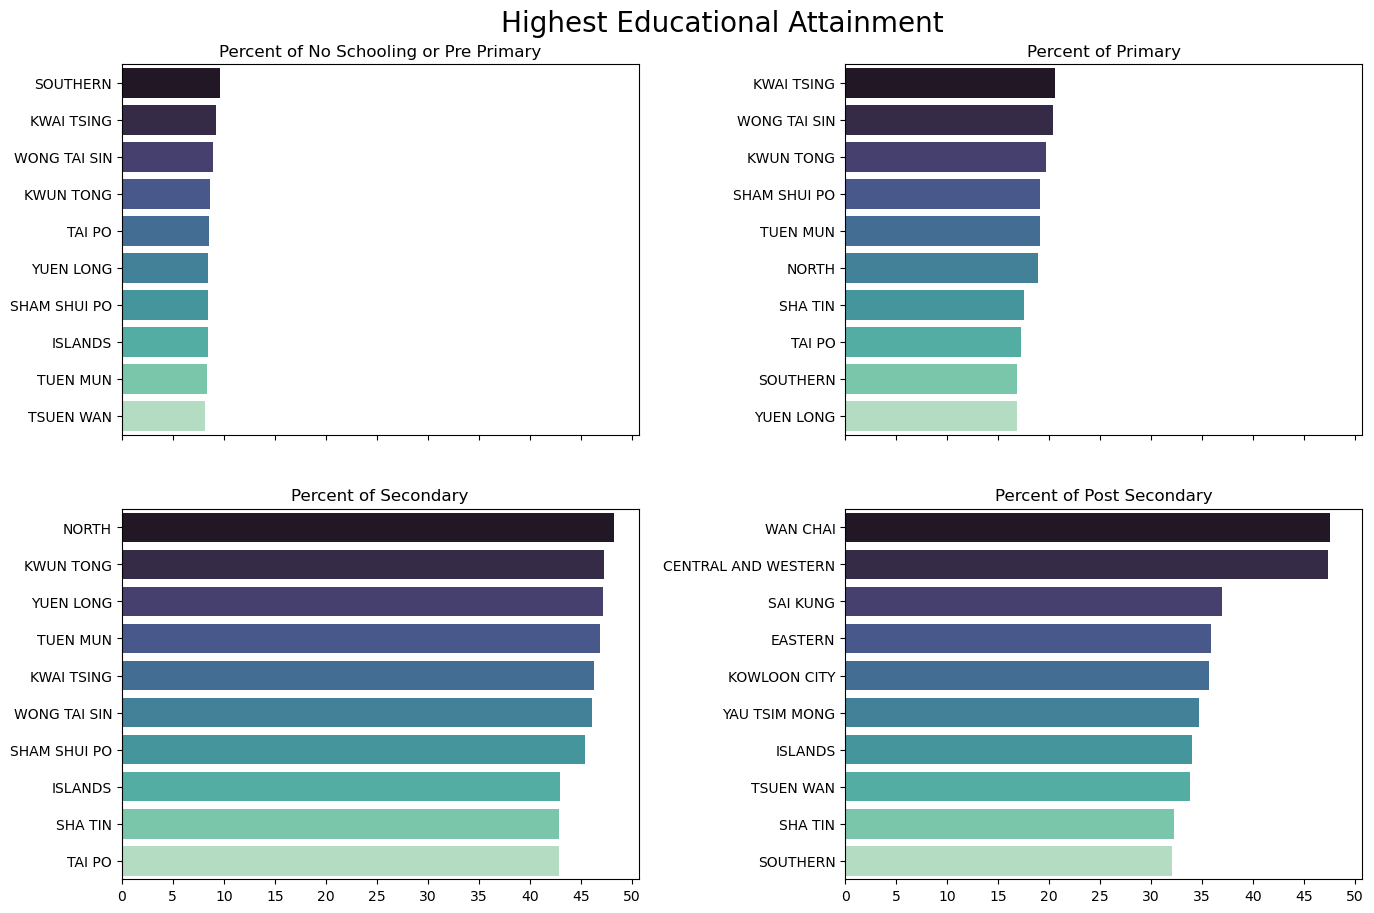

In [27]:
# Data Visualisation

fig1, axs1 = plt.subplots(2, 2, sharex='all', figsize=(16, 10))
fig1.suptitle('Highest Educational Attainment', size=20)

sns.barplot(x=data0['%_no_schooling_or_pre_primary'], y=data0['district'], data=data0, ax=axs1[0,0], palette='mako').set(title='Percent of No Schooling or Pre Primary')
sns.barplot(x=data1['%_primary'], y=data1['district'], data=data1, ax=axs1[0,1], palette='mako').set(title='Percent of Primary')
# sns.barplot(x=data2['%_lower_secondary'], y=data2['district'], data=data2, ax=axs1[1,0], palette='mako').set(title='Percent of Lower Secondary')
# sns.barplot(x=data3['%_upper_secondary'], y=data3['district'], data=data3, ax=axs1[1,1], palette='mako').set(title='Percent of Upper Secondary')
sns.barplot(x=data3a['%_secondary'], y=data3a['district'], data=data3a, ax=axs1[1,0], palette='mako').set(title='Percent of Secondary')
sns.barplot(x=data4['%_post_secondary'], y=data4['district'], data=data4, ax=axs1[1,1], palette='mako').set(title='Percent of Post Secondary')

axs1[0, 0].xaxis.set_major_locator(MultipleLocator(5))
axs1[0, 0].set_xlabel('')
axs1[0, 0].set_ylabel('')

axs1[0, 1].xaxis.set_major_locator(MultipleLocator(5))
axs1[0, 1].set_xlabel('')
axs1[0, 1].set_ylabel('')

axs1[1, 0].xaxis.set_major_locator(MultipleLocator(5))
axs1[1, 0].set_xlabel('')
axs1[1, 0].set_ylabel('')

axs1[1, 1].xaxis.set_major_locator(MultipleLocator(5))
# axs1[1, 1].xaxis.set_tick_params(labelbottom=True)
axs1[1, 1].set_xlabel('')
axs1[1, 1].set_ylabel('')

# axs1[2, 0].xaxis.set_major_locator(MultipleLocator(5))
# axs1[2, 0].set_xlabel('')
# axs1[2, 0].set_ylabel('')

# axs1[2, 1].axis('off')

plt.subplots_adjust(top=.925, wspace=.4)
plt.show()